In [95]:
import pandas as pd
import numpy as np
import regex as re
import os
import cv2
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
def preprocess_data(size=('full', 'noon')):
    """
    Preprocesses images from file. Returns metadata in a dataframe, and a np array of image data.
    Use
    """

    folder_path = "../raw_data/PanelImages"
    image_data = [] # initialise an empty array to stack the images
    metadata = []
    # Regular expression pattern to extract date and intensity values from the filename

    # capped at 1000 for now
    for filename in os.listdir(folder_path):
        split_name = filename.split('_')
        hour = split_name[4]
        if size == 'noon' and hour != '12':
            continue
        weekday = split_name[1]
        month = split_name[2]
        day = split_name[3]
        minute = split_name[6]
        second = split_name[8]
        year = split_name[9]
        datetime_obj = datetime.strptime(f"{month} {day} {year} {hour}:{minute}:{second}", "%b %d %Y %H:%M:%S")
        age_loss = split_name[11]
        irradiance_level = split_name[13][:-4]

        # append metadata to list
        filename_info = [month, weekday, day, hour, minute, second, year, datetime_obj, age_loss, irradiance_level]

        metadata.append(filename_info)

        file_path = os.path.join(folder_path, filename)

        # Load the image using OpenCV
        image = cv2.imread(file_path)

        # Resize the image to 224x224 using bilinear interpolation - OPTION to save the resized images so this never is done again!
        resized_image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_LINEAR)

        # Convert the image to a numpy array (tensor)
        # OpenCV loads images in BGR format by default, this convert to RGB
        image_array = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        image_data.append(image_array)

    # Convert the list of tuples to a pandas DataFrame
    df = pd.DataFrame(metadata, columns=['Month', 'Day', 'Date', 'Hour', 'Minute', 'Second', 'Year',
                                        'Datetime', 'Percentage Loss', 'Irradiance Level'])

    df = df.astype({'Month': str, 'Day': str, 'Date': int, 'Hour': int, 'Minute': int, 'Second': int, 'Year': int,
                                       'Datetime': 'datetime64[ns]', 'Percentage Loss': float, 'Irradiance Level': float})

    # convert image data to numpy arrays
    image_data = np.array(image_data)
    # normalize the image data
    image_data = image_data / 255.0

    # return metadata and normalized image data
    return df, image_data

In [79]:
df, image_data = preprocess_data('noon')

In [80]:
df.shape

(3736, 10)

In [81]:
image_data.shape

(3736, 224, 224, 3)

In [82]:
image_data[0]

array([[[181, 220, 235],
        [181, 220, 235],
        [181, 220, 234],
        ...,
        [ 85, 101, 128],
        [104, 121, 149],
        [ 85, 102, 130]],

       [[181, 220, 235],
        [180, 219, 234],
        [180, 220, 233],
        ...,
        [ 94, 109, 138],
        [ 92, 110, 138],
        [ 78,  95, 123]],

       [[180, 219, 234],
        [180, 219, 234],
        [180, 219, 233],
        ...,
        [ 97, 112, 142],
        [ 85, 102, 132],
        [ 73,  90, 119]],

       ...,

       [[110, 108,  96],
        [110, 108,  96],
        [114, 111,  99],
        ...,
        [ 44,  44,  42],
        [ 46,  46,  44],
        [ 59,  59,  57]],

       [[113, 111,  98],
        [113, 111,  98],
        [116, 113, 100],
        ...,
        [ 42,  42,  39],
        [ 61,  60,  59],
        [119, 118, 116]],

       [[115, 113, 100],
        [115, 113, 100],
        [115, 112, 100],
        ...,
        [ 54,  54,  52],
        [107, 106, 104],
        [195, 194, 192]]

In [83]:
image_data = image_data/255.0

In [84]:
image_data[0]

array([[[0.70980392, 0.8627451 , 0.92156863],
        [0.70980392, 0.8627451 , 0.92156863],
        [0.70980392, 0.8627451 , 0.91764706],
        ...,
        [0.33333333, 0.39607843, 0.50196078],
        [0.40784314, 0.4745098 , 0.58431373],
        [0.33333333, 0.4       , 0.50980392]],

       [[0.70980392, 0.8627451 , 0.92156863],
        [0.70588235, 0.85882353, 0.91764706],
        [0.70588235, 0.8627451 , 0.91372549],
        ...,
        [0.36862745, 0.42745098, 0.54117647],
        [0.36078431, 0.43137255, 0.54117647],
        [0.30588235, 0.37254902, 0.48235294]],

       [[0.70588235, 0.85882353, 0.91764706],
        [0.70588235, 0.85882353, 0.91764706],
        [0.70588235, 0.85882353, 0.91372549],
        ...,
        [0.38039216, 0.43921569, 0.55686275],
        [0.33333333, 0.4       , 0.51764706],
        [0.28627451, 0.35294118, 0.46666667]],

       ...,

       [[0.43137255, 0.42352941, 0.37647059],
        [0.43137255, 0.42352941, 0.37647059],
        [0.44705882, 0

In [85]:
metadata = []
folder_path = "../raw_data/PanelImages"
for filename in os.listdir(folder_path):
        split_name = filename.split('_')
        hour = split_name[4]
        weekday = split_name[1]
        month = split_name[2]
        day = split_name[3]
        minute = split_name[6]
        second = split_name[8]
        year = split_name[9]
        datetime_obj = datetime.strptime(f"{month} {day} {year} {hour}:{minute}:{second}", "%b %d %Y %H:%M:%S")
        age_loss = split_name[11]
        irradiance_level = split_name[13][:-4]

        # append metadata to list
        filename_info = [month, weekday, day, hour, minute, second, year, datetime_obj, age_loss, irradiance_level]

        metadata.append(filename_info)

# Convert the list to a pandas DataFrame
df = pd.DataFrame(metadata, columns=['Month', 'Day', 'Date', 'Hour', 'Minute', 'Second', 'Year',
                                    'Datetime', 'Percentage Loss', 'Irradiance Level'])

df = df.astype({'Month': str, 'Day': str, 'Date': int, 'Hour': int, 'Minute': int, 'Second': int, 'Year': int,
                                    'Datetime': 'datetime64[ns]', 'Percentage Loss': float, 'Irradiance Level': float})

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45754 entries, 0 to 45753
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             45754 non-null  object        
 1   Day               45754 non-null  object        
 2   Date              45754 non-null  int64         
 3   Hour              45754 non-null  int64         
 4   Minute            45754 non-null  int64         
 5   Second            45754 non-null  int64         
 6   Year              45754 non-null  int64         
 7   Datetime          45754 non-null  datetime64[ns]
 8   Percentage Loss   45754 non-null  float64       
 9   Irradiance Level  45754 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 3.5+ MB


In [87]:
df.describe()

,Date,Hour,Minute,Second,Year,Datetime,Percentage Loss,Irradiance Level
count,45754.000000,45754.000000,45754.000000,45754.000000,45754.0,45754,45754.000000,45754.000000
mean,21.025025,11.808672,28.844888,29.563841,2017.0,2017-06-21 12:53:53.649604608,0.265098,0.345781
min,13.000000,6.000000,0.000000,0.000000,2017.0,2017-06-13 09:46:49,0.000000,0.002682
25%,15.000000,9.000000,14.000000,14.000000,2017.0,2017-06-15 11:29:29.249999872,0.031738,0.189629
50%,22.000000,12.000000,28.000000,29.000000,2017.0,2017-06-22 12:58:23.500000,0.119817,0.310786
75%,26.000000,15.000000,44.000000,45.000000,2017.0,2017-06-26 09:46:01.750000128,0.522474,0.483816
max,30.000000,17.000000,59.000000,59.000000,2017.0,2017-06-30 15:58:00,0.996159,1.006125
std,5.434381,3.120193,17.343180,17.403341,0.0,NaN,0.284057,0.206151


I've visually validated these entries in the dataset

In [88]:
df[df['Irradiance Level'] > 1]

,Month,Day,Date,Hour,Minute,Second,Year,Datetime,Percentage Loss,Irradiance Level
11429,Jun,Wed,21,12,59,53,2017,2017-06-21 12:59:53,0.039557,1.000298
18138,Jun,Wed,21,12,59,59,2017,2017-06-21 12:59:59,0.067040,1.006125


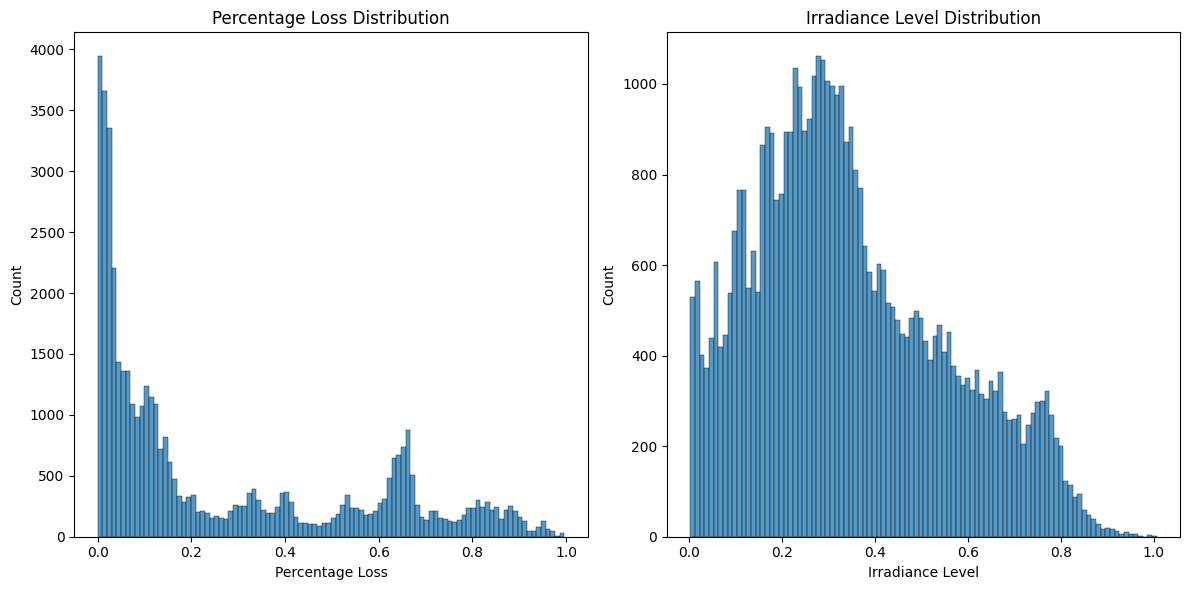

In [100]:
# create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Percentage Loss distribution
sns.histplot(data=df['Percentage Loss'], bins=100, ax=axes[0])
axes[0].set_title('Percentage Loss Distribution')

# Plot Irradiance Level distribution
sns.histplot(data=df['Irradiance Level'], bins=100, ax=axes[1])
axes[1].set_title('Irradiance Level Distribution')

plt.tight_layout()
plt.show()

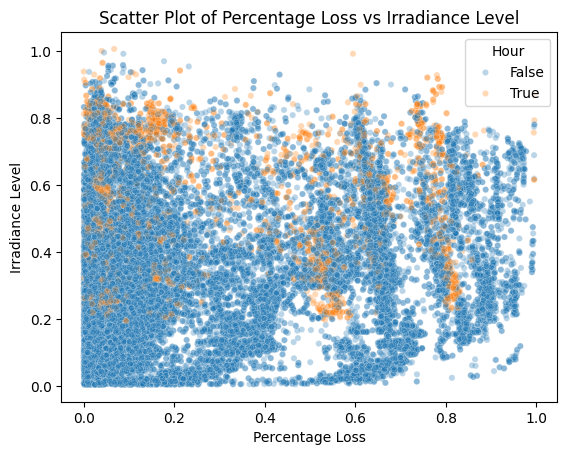

In [114]:
# scatter plot Loss vs Irradiance
mask_noon = df['Hour'] == 12

sns.scatterplot(x=df['Percentage Loss'], y=df['Irradiance Level'], hue=mask_noon, s=20, alpha=0.3)

# Set plot title and axis labels
plt.title('Scatter Plot of Percentage Loss vs Irradiance Level')
plt.xlabel('Percentage Loss')
plt.ylabel('Irradiance Level')

plt.show()